In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Dibyendu De\AppData\Local\Temp\ipykernel_16924\506371123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=True)


(0.0, 60.0)

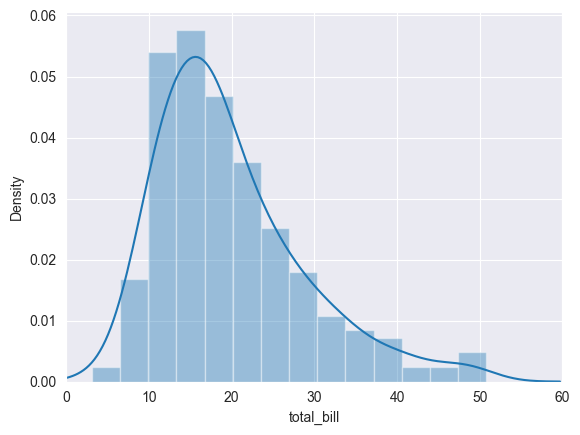

In [45]:
sns.distplot(tips['total_bill'], kde=True)
plt.xlim(0, 60)

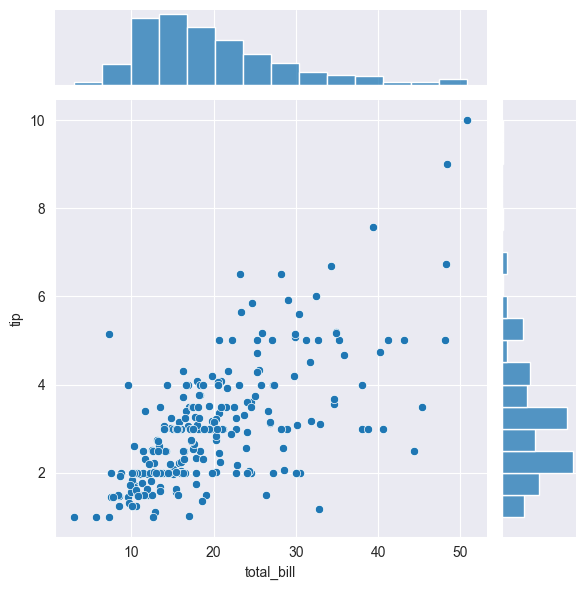

In [29]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')
# plt.xlim(-10, 70); plt.ylim(-2, 12)

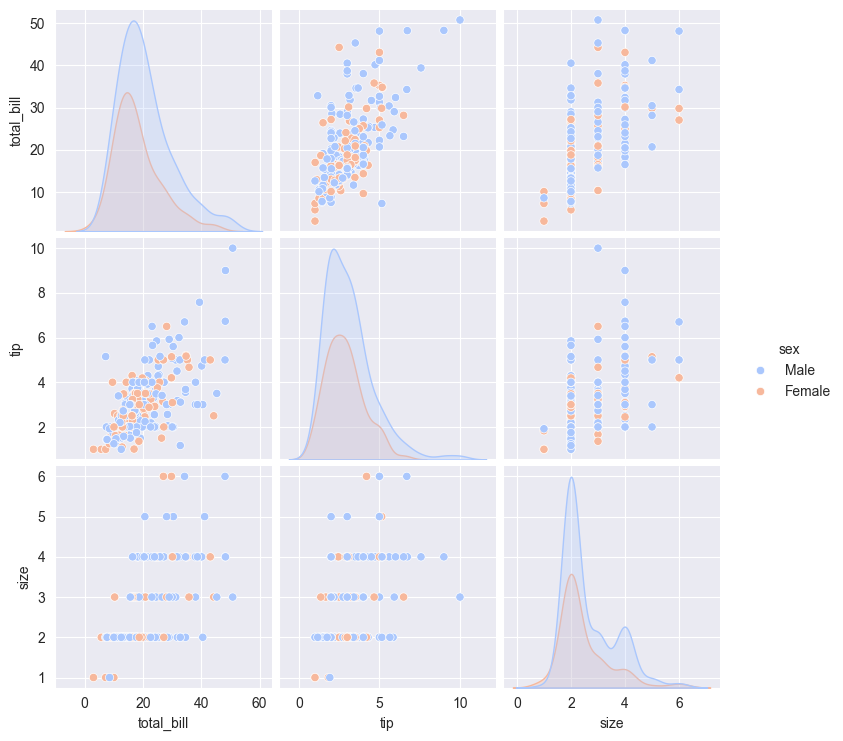

In [42]:
sns.pairplot(data=tips, hue='sex', palette='coolwarm')

<Axes: xlabel='total_bill'>

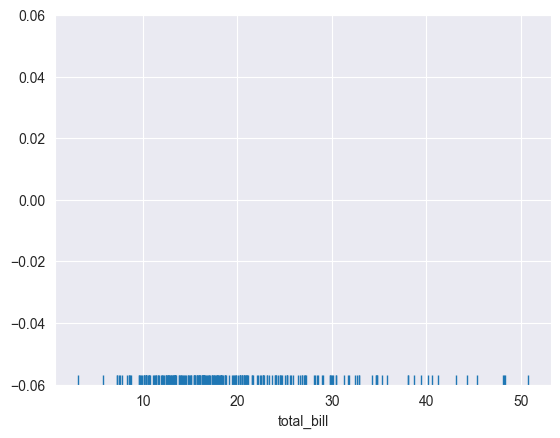

In [44]:
sns.rugplot(data=tips['total_bill'])

(0.0, 1.0)

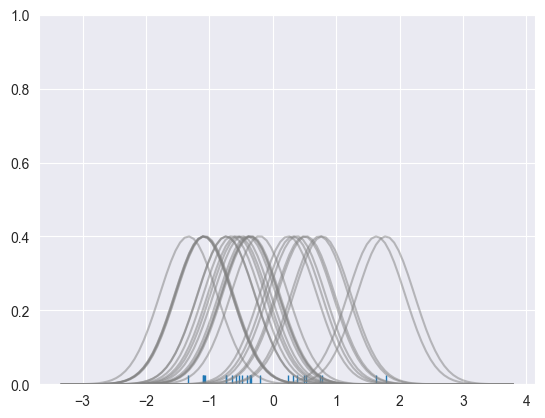

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# creating dataset
dataset = np.random.randn(25)

# creating another rugplot
sns.rugplot(data=dataset)

# setting up the xx-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

# setting up the bandwith, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwith'
bandwith = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** .2

# creating an empty kernel list
kernel_list = []

# plotting each basis function
for data_points in dataset:

    # creating a kernel for each point and append to list
    kernel = stats.norm(data_points, bandwith).pdf(x_axis)
    kernel_list.append(kernel)

    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='gray', alpha=0.5)

plt.ylim(0, 1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

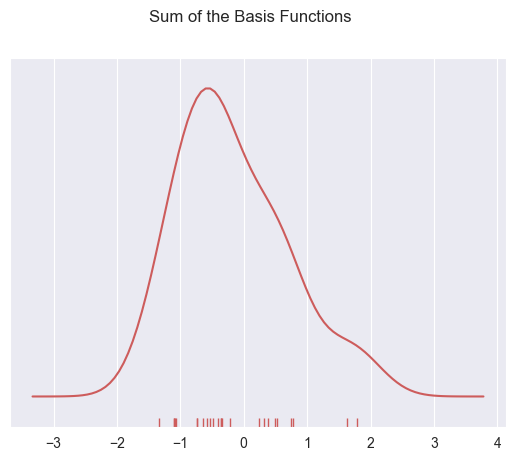

In [59]:
# to get the kde plot we can sum these basis functions

# plotting the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

# plotting the figure
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

# adding the initial rugplot
sns.rugplot(data=dataset, c='indianred')

# getting rid of y-tick marks
plt.yticks([])

# setting the title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

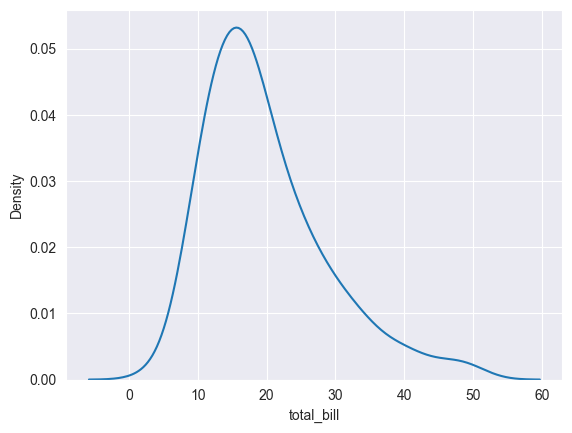

In [64]:
sns.kdeplot(data=tips['total_bill'], legend=True)